In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
from sqlalchemy.orm import Session

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d28d2ee850>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [13]:
conn = engine.connect()
recent_date = pd.read_sql("SELECT date FROM measurement ORDER BY date DESC LIMIT 1", conn)
recent_date

,date
0,2017-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
one_year = pd.read_sql("SELECT date, prcp FROM measurement WHERE date <='2017-08-24' AND date >='2016-08-23' ORDER BY date", conn)

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
one_year = one_year.groupby(by=["date"]).sum()
one_year

,prcp
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


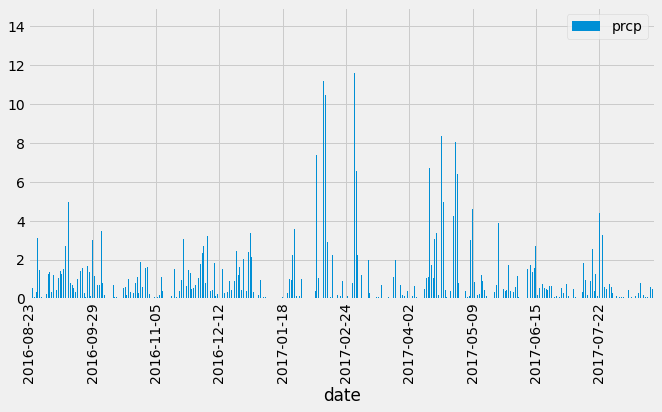

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

one_plot = one_year.plot(kind="bar", figsize=(10,5))
one_plot.locator_params(axis='x', nbins=10)
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
one_year.describe()

,prcp
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
num_station = pd.read_sql("SELECT COUNT ( DISTINCT station ) AS 'Number of stations' FROM station", conn)

num_station

,Number of stations
0,9


In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
busy_station = pd.read_sql("SELECT COUNT (*) AS num_of_activty, station FROM measurement GROUP BY station ORDER BY COUNT(*) DESC", conn)

busy_station

,num_of_activty,station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519281 = pd.read_sql("SELECT * FROM measurement WHERE station = 'USC00519281'", conn)
USC00519281.describe()

,id,prcp,tobs
count,2772.000000,2772.000000,2772.000000
mean,13573.500000,0.212352,71.663781
std,800.351798,0.543312,4.357642
min,12188.000000,0.000000,54.000000
25%,12880.750000,0.000000,69.000000
50%,13573.500000,0.040000,72.000000
75%,14266.250000,0.190000,74.000000
max,14959.000000,9.640000,85.000000


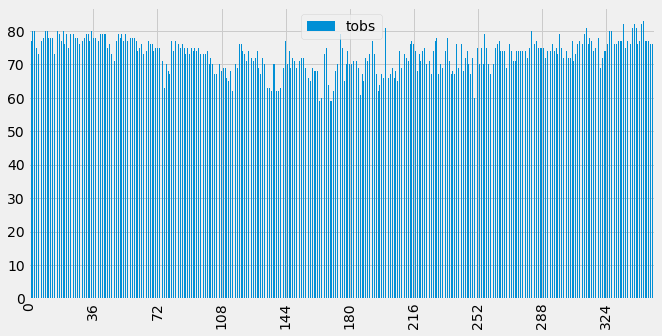

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_station = pd.read_sql("SELECT date, tobs FROM measurement WHERE date <='2017-08-24' AND date >='2016-08-23' AND station = 'USC00519281' ORDER BY date", conn)
oys_plot = one_year_station.plot(kind="bar", figsize=(10,5))
oys_plot.locator_params(axis='x', nbins=10)
plt.show()

# Close session

In [30]:
# Close Session
session.close()